## 2 Create submodel

In [63]:
import numpy as np
import pylab as plt
import math
import matplotlib.pyplot as plt
import pickle

(315250, 422250, 6394250, 6621250)
(454, 214)


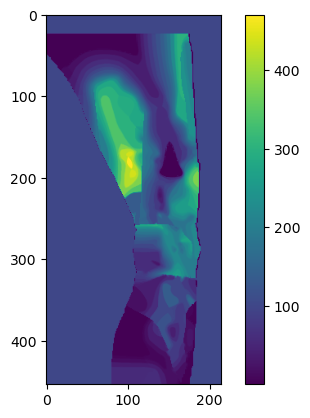

In [64]:
# PRAMS boundaries
NLAY, NROW, NCOL = 13, 454, 214
west, east = 315250, 315250 + NCOL*500
south, north = 6394250, 6394250 + NROW*500
#south, north = 6525000, 6525000 + NROW*500

# Load in arrays
array_name = ['recharge','top','bot','mask','hk','vk','ss','sy','heads']
arrays = []
for s in array_name:
    filename = '../inputs/%s.pkl' %s
    pickleoff = open(filename,'rb')
    array = pickle.load(pickleoff)
    arrays.append(array)
    pickleoff.close()
Recharge,Top,Bot,Mask,Hk,Vk,Ss,Sy,Heads = arrays[0],arrays[1],arrays[2],arrays[3],arrays[4],arrays[5],arrays[6],arrays[7],arrays[8]

# Creat log arrays for conductivity
logfunc = lambda e: np.log10(e)
Hk_log = logfunc(Hk)
Vk_log = logfunc(Vk)

Thickness = np.zeros((NLAY, NROW, NCOL))
Thickness[0,:,:] = Top - Bot[0]
Thickness[1:-1,:,:] = Bot[0:-2] - Bot[1:-1]
plt.imshow(Thickness[6])
plt.colorbar()
print('(%.0f, %.0f, %.0f, %.0f)' %(west, east, south, north))
print(Recharge.shape)

In [65]:
layers = ['Superficial','Superficial','Superifical','Mirrabooka','Kardinya',
          'Pinjar','Wanneroo','Maringiniup','South Perth Shale','Parmelia','Otorowiri','Yarragadee','Yarragadee']
nlay = 13

X0,X1,Y0,Y1 = west, east, south, north
X = np.arange(X0+250,X1,500)
Y = np.arange(Y1-250,Y0,-500)

print(len(Y))

454


In [66]:
delr = np.arange(X0, X1, 500)
delc = np.arange(Y0, Y1, 500)
print(delr.shape)
print(delc.shape)
X0,Y0

(214,)
(454,)


(315250, 6394250)

In [67]:
from flopy.discretization import StructuredGrid
working_grid = StructuredGrid(
    nlay=nlay,
    delr=np.full(NCOL, 500),
    delc=np.full(NROW, 500),
    xoff=X0,
    yoff=Y0,
    top=Top,
    botm=Bot,
)

#set_structured_idomain(working_grid, boundary_polygon)
#print("grid data: ", Lx, Ly, nrow, ncol)

In [68]:
lay_array = np.ones_like(Bot)
for n in range(Bot.shape[0]): # for each layer
    lay_array[n,:,:] *= n
    

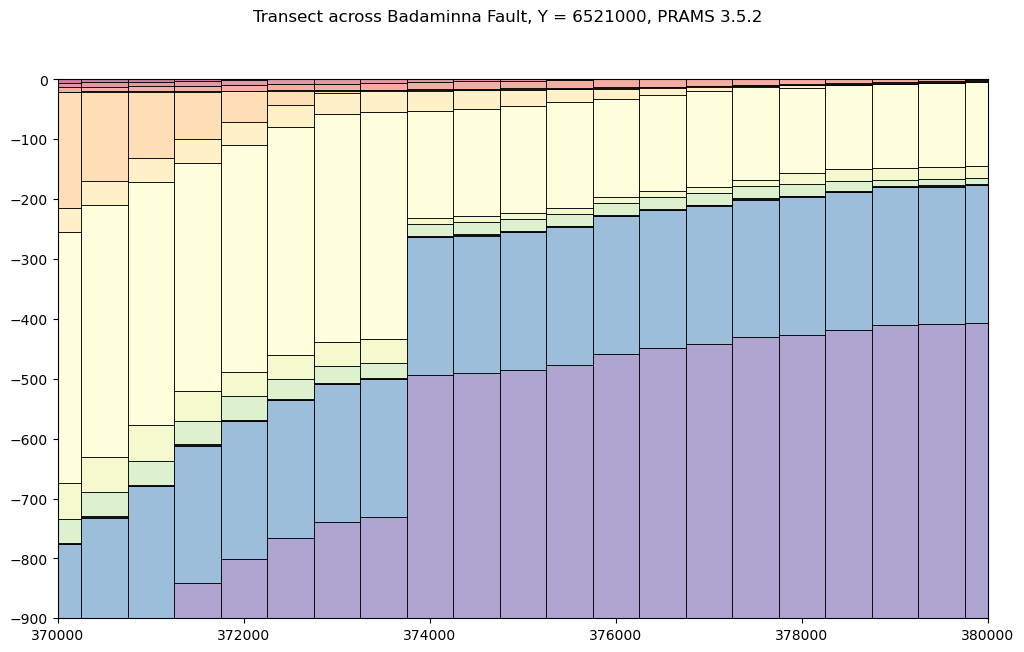

In [84]:
import flopy

#a = logfunc(Hk)
a = lay_array

fig = plt.figure(figsize = (12,7))
fig.suptitle("Transect across Badaminna Fault, Y = 6521000, PRAMS 3.5.2")
ax = plt.subplot(111)
xsect = flopy.plot.PlotCrossSection(modelgrid=working_grid, line={"line": [(X0, 6521000),(X1, 6521000)]}, 
                                     geographic_coords=True) #line={"row": 200}, 
csa = xsect.plot_array(a = a, cmap='Spectral', alpha=0.5)#, vmin = vmin, vmax = vmax)
plt.xlim([370000,380000])
plt.ylim([-900, 0])       
linecollection = xsect.plot_grid(lw = 0.5, color = 'black') # Don't plot grid for reference
#plt.colorbar(csa, shrink = 0.7)
        
#cb_ax = fig.add_axes([.44,.44,.007,0.1])
#fig.colorbar(csa,orientation='vertical',cax=cb_ax, label='Log Kh')

## Define submodel

In [6]:
transect_y = 6530000 
row = int((north - transect_y)/500) # PRAMS row

recharge,top = Recharge[row,:], Top[row,:]
bot,thickness,mask = Bot[:,row,:], Thickness[:,row,:], Mask[:,row,:]
hk,vk = Hk[:,row,:], Vk[:,row,:]
ss,sy,heads= Ss[:,row,:], Sy[:,row,:], Heads[:,row,:]
angle2 = np.zeros((13,214))
for k in range(13):
        for i in range(213):
            angle2[k,i] = np.degrees(math.atan((bot[k,i+1] - bot[k,i])/500)) # angle2 dip along colums

angle2[np.isnan(angle2)] = 0  

In [7]:
pickle.dump(recharge, open('input_arrays/rechargetransx.pkl', 'wb'))
pickle.dump(hk, open('input_arrays/hktransx.pkl', 'wb'))
pickle.dump(top, open('input_arrays/toptransx.pkl', 'wb'))
pickle.dump(thickness, open('input_arrays/thicknesstransx.pkl', 'wb'))
pickle.dump(bot, open('input_arrays/bottransx.pkl', 'wb'))
pickle.dump(mask, open('input_arrays/masktransx.pkl', 'wb'))
pickle.dump(vk, open('input_arrays/vktransx.pkl', 'wb'))
pickle.dump(ss, open('input_arrays/sstransx.pkl', 'wb'))
pickle.dump(sy, open('input_arrays/sytransx.pkl', 'wb'))
pickle.dump(heads, open('input_arrays/headstransx.pkl', 'wb'))
pickle.dump(angle2, open('input_arrays/angle2transx.pkl', 'wb'))